In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


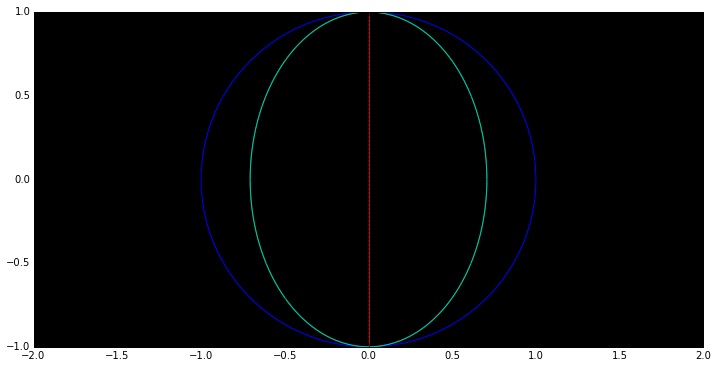

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

t = np.linspace(0, 2*np.pi, 1000)
v = np.asarray(zip(np.sin(t), [0]*len(t), np.cos(t))).T
fins = 4
theta = pi/fins
rotmat = np.asarray([[np.cos(theta), np.sin(theta), 0], [-np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
obj = [v]

for fin in xrange(fins-1):
    v = rotmat.dot(v)
    obj.append(v)

x, y, z = zip(*np.asarray(obj).T)
x = np.asarray(x)
y = np.asarray(y)
z = np.asarray(z)
plt.figure(figsize=(12,6))
plt.plot(x, z)
plt.axis('equal')
plt.gca().set_axis_bgcolor('k')

In [5]:
from matplotlib import animation
import animembed

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
plt.gca().set_axis_bgcolor('k')
ax.axis('off')

# prepare the axes limits
scale = 1
ax.set_xlim((-scale, scale))
ax.set_ylim((-scale, scale))
ax.set_zlim((-scale, scale))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
start_az = theta/2*180/np.pi
start_el = 45
ax.view_init(start_el, start_az)

lines = []
for fin in xrange(fins):
    lines += ax.plot([], [], [], '-')

# initialization function: plot the background of each frame
def init():
    for (j, line) in enumerate(lines):
        line.set_data(x.T[j], y.T[j])
        line.set_3d_properties(z.T[j])
        line.set_linewidth(10)
    return lines


alpha = np.linspace(0, 720, 100)

# animation function.  This will be called sequentially with the frame number
def animate(i):
#     i = max(1, i % v.shape[0])
    
    # rotate the point of view
    del_alpha = alpha[i % len(alpha)]
    ax.view_init(start_el, start_az + del_alpha)
    fig.canvas.draw()
    return lines

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=len(alpha), interval=1, blit=True)


# call our new function to display the animation
animembed.display_animation(anim)

In [4]:
# anim.save('spiral.gif', fps=15)
anim.save('spiral.gif', writer='imagemagick', fps=15)